### import

fastai is designed to support both interactive computing as well as traditional software development. For interactive computing, where convenience and speed of experimentation is a priority, data scientists often prefer to grab all the symbols they need, with import *. Therefore, fastai is designed to support this approach, without compromising on maintainability and understanding.

In [1]:
from fastai import *
from fastai.core import *
from fastai.vision import *

### 数据加载

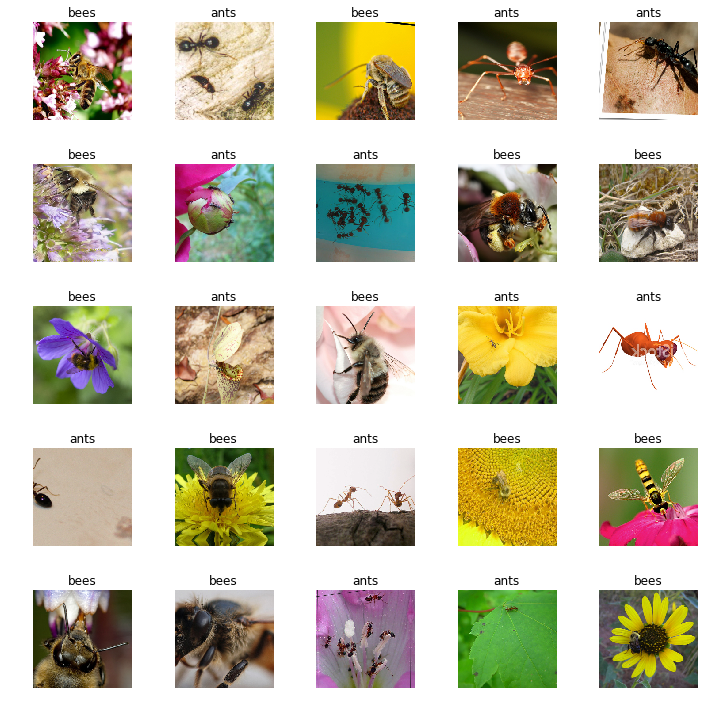

In [7]:
path_train = Path('data/hymenoptera_data')
data = ImageDataBunch.from_folder(path_train, ds_tfms=get_transforms(), size=224)
data.show_batch(rows=5, figsize=(10, 10))

### 训练

In [8]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

### ConvNet as fixed feature extractor

In [20]:
learn.fit_one_cycle(1)

In [21]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

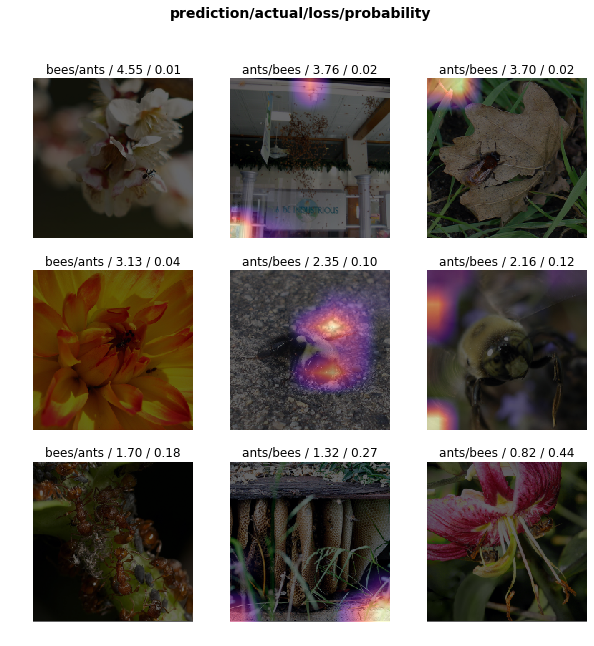

In [22]:
interp.plot_top_losses(9, figsize=(10,10))

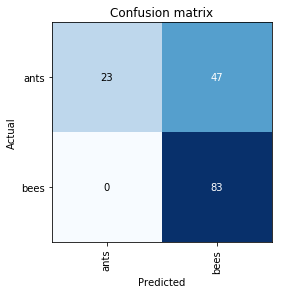

In [18]:
interp.plot_confusion_matrix()

### Finetuing

In [19]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-5,3e-4))